<a href="https://colab.research.google.com/github/ilhamsyamsuddin/intermediate-python-batch6/blob/main/hotel_Ilham_syamsuddin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##%matplotlib inline

#Import dataset

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/ilhamsyamsuddin/intermediate-python-batch6/main/hotel.csv")
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [39]:
from google.colab import files


In [8]:
x= list(df.columns[df.isnull().any()])
y = list(df.isnull().sum().sort_values(ascending=False)[:len(x)])

In [12]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

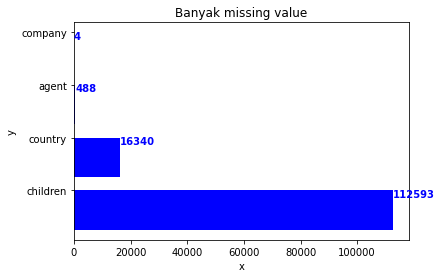

In [9]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Banyak missing value')
plt.xlabel('x')
plt.ylabel('y')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
#plt.show()
plt.savefig("abc.png")
files.download("abc.png") 

Mean, median, std, min, max

## Mean, median, dll


In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [24]:
df['previous_bookings_not_canceled'].describe()

count    119390.000000
mean          0.137097
std           1.497437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.000000
Name: previous_bookings_not_canceled, dtype: float64

In [29]:
df['total_of_special_requests'].describe()

count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64

# Dealing with missing values

### Persentase

In [44]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)[:4]

company     0.943069
agent       0.136862
country     0.004087
children    0.000034
dtype: float64

Drop Company

In [56]:
dataset = df.copy()
dataset.drop(columns=['company'], inplace=True)

In [57]:
dataset.shape

(119390, 31)

Fill the missing value with the mean

In [58]:
dataset['agent'] = dataset['agent'].fillna((dataset['agent'].mean()))

Filling the missing value in 'country' and 'children' with the mode

In [69]:
dataset['children'].isnull().sum()

4

In [70]:
dataset['country'].isnull().sum()

488

In [71]:
dataset['children'] = dataset['children'].fillna(dataset['children'].mode()[0])

In [72]:
dataset['country'] = dataset['country'].fillna(dataset['country'].mode()[0])

In [73]:
dataset['children'].isnull().sum()

0

In [74]:
dataset['country'].isnull().sum()

0

Membuat kategori untuk lead time

In [76]:
dataset['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [80]:
conditions = [
              dataset['lead_time'] <18,
              (dataset['lead_time']>=18) & (dataset['lead_time']<=160),
              dataset['lead_time']>160
]

labels=['Short', 'Medium', 'Long']
dataset['category'] = np.select(conditions, labels)

In [84]:
dataset[['lead_time','category']]

,lead_time,category
0,342,Long
1,737,Long
2,7,Short
3,13,Short
4,14,Short
...,...,...
119385,23,Medium
119386,102,Medium
119387,34,Medium
119388,109,Medium


Filter data 'reservation_status_date' > 2017

In [85]:
dataset['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [86]:
dataset['reservation_status_date'] = pd.to_datetime(dataset['reservation_status_date'], format='%Y-%m-%d')

In [89]:
above_2017 = df.loc[(dataset['reservation_status_date'] >= '2017-01-01')]
                    
# Display
above_2017['reservation_status_date'][:10]

9788    2017-01-02
9805    2017-01-03
9809    2017-01-04
9813    2017-01-01
9818    2017-01-06
9838    2017-01-10
9840    2017-01-10
9841    2017-01-11
9842    2017-01-10
9843    2017-01-11
Name: reservation_status_date, dtype: object

Visualisasi 'arrival_month'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

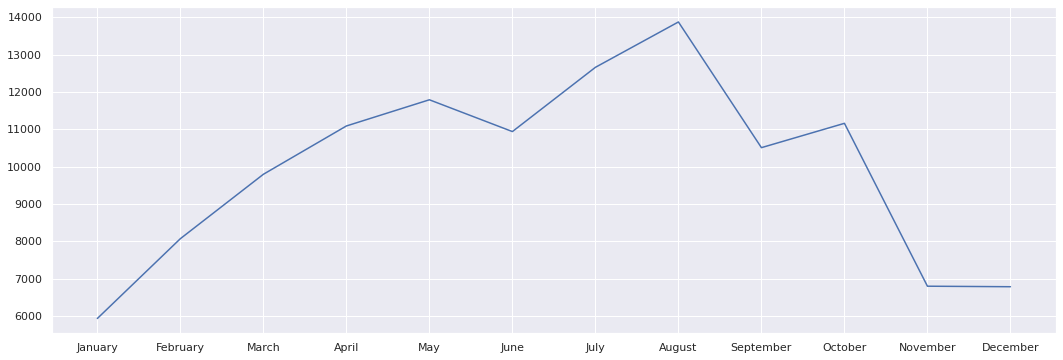

In [107]:
import seaborn as sns
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = dataset['arrival_date_month'].value_counts().reindex(month_order)

x = sorted_months.index
y = sorted_months.values

sns.set(rc={'figure.figsize':(18,6)})
hasil = sns.lineplot(x, y).get_figure()
hasil.savefig("output.png")
files.download("output.png")
#plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


In [97]:
y

January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: arrival_date_month, dtype: int64